# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula:

In [60]:
# Calculando média e evolução
df['média'] = df.mean(axis=1)
df['diferença'] = df.p2-df.p1
df1 = df.style.format(precision=1, decimal=',')
df = df1.data
df.head()

,p1,p2,média,diferença
0,6.964692,7.943428,5.329344,0.978736
1,2.861393,5.099537,3.408766,2.238143
2,2.268515,0.974429,0.664805,-1.294085
3,5.513148,4.474359,3.014326,-1.038788
4,7.194690,8.938402,5.991866,1.743712


b) Calcule a correlação entre os dados da **p1** e **p2**:

In [39]:
from scipy.stats import pearsonr 

In [61]:
list1 = df['p1'] 
list2 = df['p2'] 
corr, _ = pearsonr(list1, list2) 

print('Pearsons correlation: %.3f' % corr)   

Pearsons correlation: 0.896


c) Calcule a correlação entre os dados transformados (média e diferença):

In [62]:
list1 = df['média'] 
list2 = df['diferença'] 
corr, _ = pearsonr(list1, list2) 

print('Pearsons correlation: %.3f' % corr)   

Pearsons correlation: 0.345


d) Comente as correlações observadas:

Sobre o Coeficiente de Correlaçao de Pearson, temos que:

* 0.9 para mais ou para menos indica uma correlação muito forte.
* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
* 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

Fonte: https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson

R. Logo, a correlação entre p1 e p2 (0,896) é mais forte do que a correção entre média e diferença (0,345).

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [85]:
df['soma'] = df['p1'] + df['p2']

In [89]:
def translin_v2(m):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -2
    xmax = df.p1.max()*1.1
    ymin = -2
    ymax = df.p2.max()*1.1

    ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    ax.arrow(0, 0, m[0,0], m[0,1]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[1,0], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)

    plt.scatter(x =  df['p1'], y=df['p2'], label = 'originais')
    plt.scatter(x = df['soma'], y=df['média'], label = 'transformados')

    ax.legend(loc='upper left')

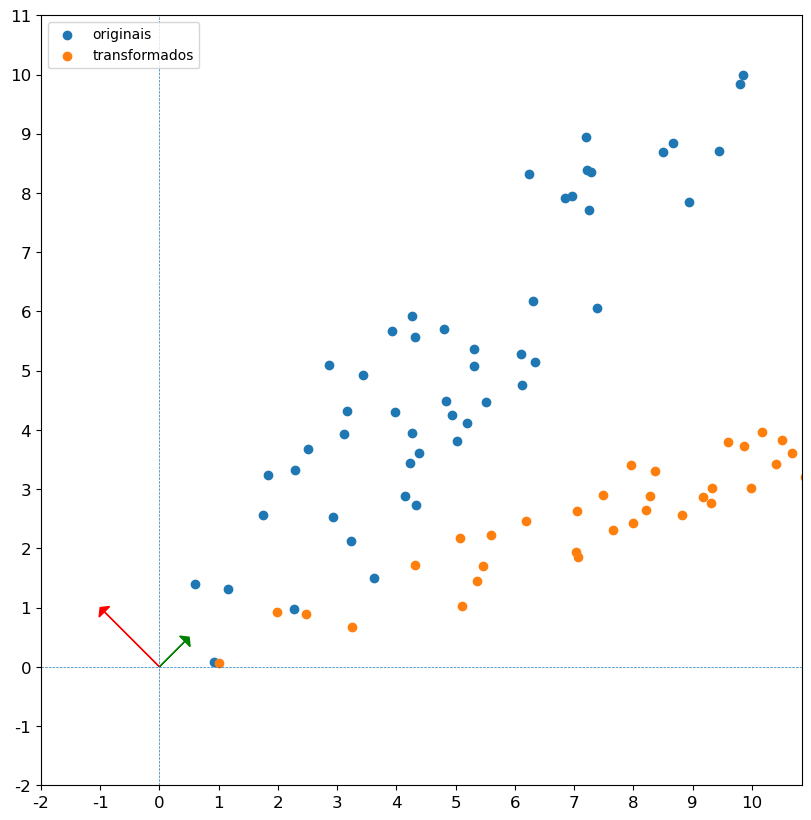

In [90]:
t = np.array([[ .5, .5],
              [ -1, 1]])
translin_v2(t)

In [91]:
def translin_v2(m):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -2
    xmax = df.p1.max()*1.1
    ymin = -2
    ymax = df.p2.max()*1.1

    ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    ax.arrow(0, 0, m[0,0], m[0,1]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[1,0], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)

    plt.scatter(x =  df['p1'], y=df['p2'], label = 'originais')
    plt.scatter(x = df['soma'], y=df['diferença'], label = 'transformados')

    ax.legend(loc='upper left')

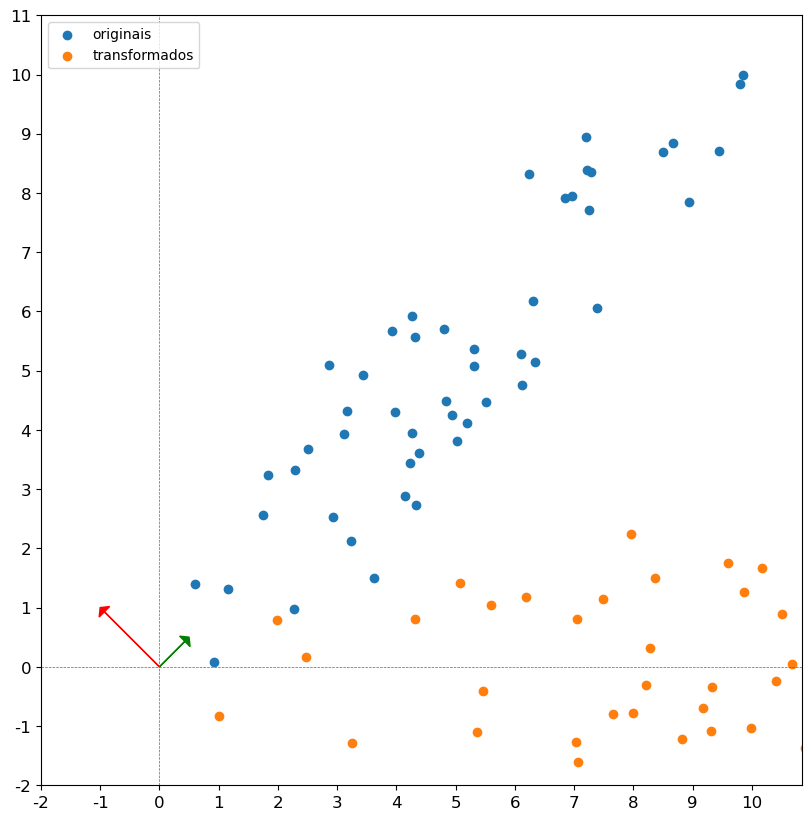

In [92]:
t = np.array([[ .5, .5],
              [ -1, 1]])
translin_v2(t)

R. Pode-se observar que no 2º gráfico (df['soma'], y=df['diferença']), a distribuição dos dados "transformados" é predominantemente horizontal, ao contrário do 1º gráfico (df['soma'], y=df['média']).